In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from itertools import combinations

In [3]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df = pd.read_csv('heart_disease.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
df_copy = df.copy()

# define the bin edges and labels
bins = [0, 18.5, 24.9, 29.9, float("inf")]
labels = [1, 2, 3, 4]

menbins = [0, 1, 7, 14, 21, float('inf')]
menlabs = [0, 1, 2, 3, 4]

phybins = [0, 1, 7, 14, 21, float('inf')]
phylabs = [0, 1, 2, 3, 4]

# categorize the BMI column into 4 levels
df_copy["BMI"] = pd.cut(df_copy["BMI"], bins=bins, labels=labels)
df_copy["MentHlth"] = pd.cut(df_copy["MentHlth"], bins=menbins, labels=menlabs, include_lowest=True)
df_copy["PhysHlth"] = pd.cut(df_copy["PhysHlth"], bins=phybins, labels=phylabs, include_lowest=True)


df_copy.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,4,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,3,3,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,3,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0,0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,4,4,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0,0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,2,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,1,0,0.0,0.0,11.0,5.0,4.0


In [ ]:
lst = []
for j in range(0, len(df)):
    n_val = str(df["HeartDiseaseorAttack"][j])+ ","+ str(df["Stroke"][j])
    lst.append(n_val)
    
HS_df = pd.DataFrame(lst)
HS_df.columns = ["HD_Stroke"]
HS_df

,HD_Stroke
0,"0.0,0.0"
1,"0.0,0.0"
2,"0.0,0.0"
3,"0.0,0.0"
4,"0.0,0.0"
...,...
253675,"0.0,0.0"
253676,"0.0,0.0"
253677,"0.0,0.0"
253678,"0.0,0.0"


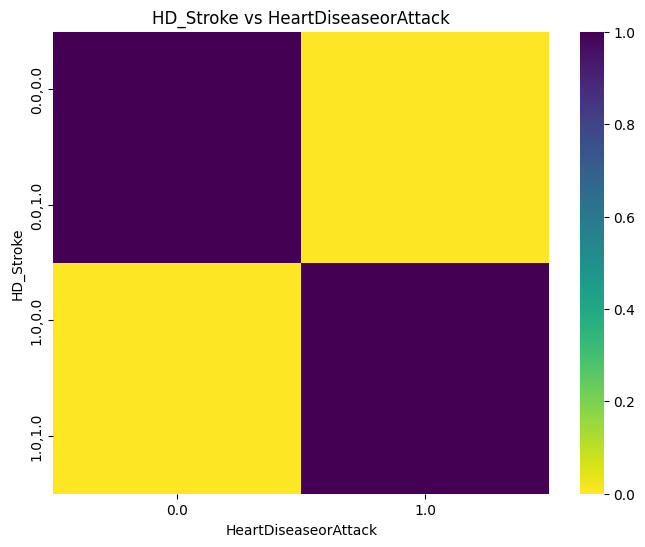

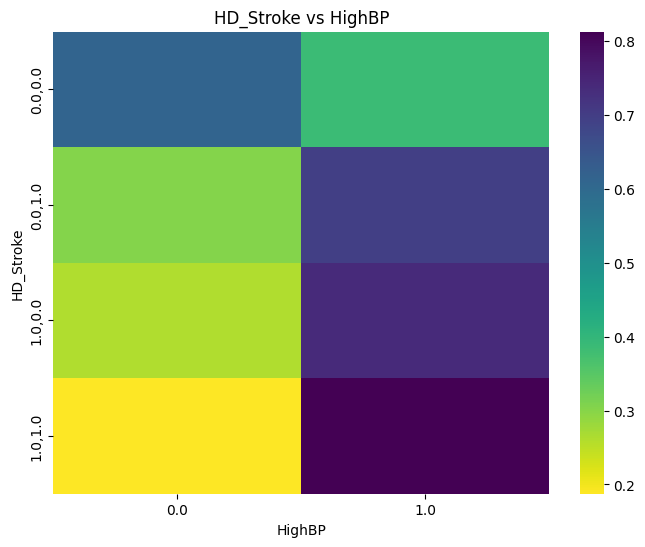

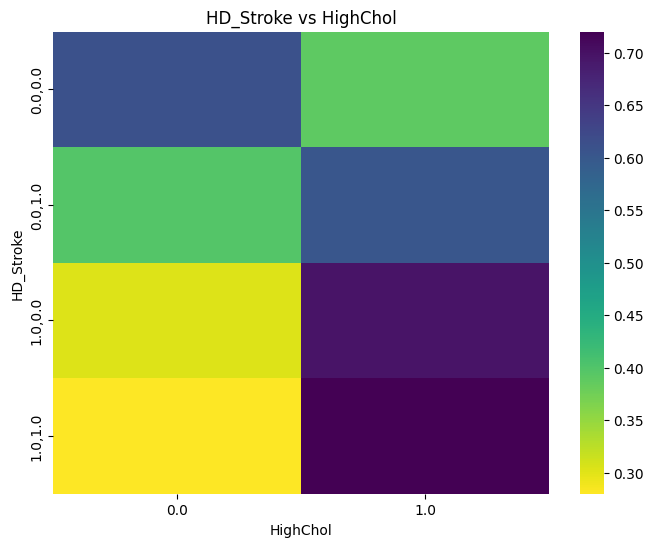

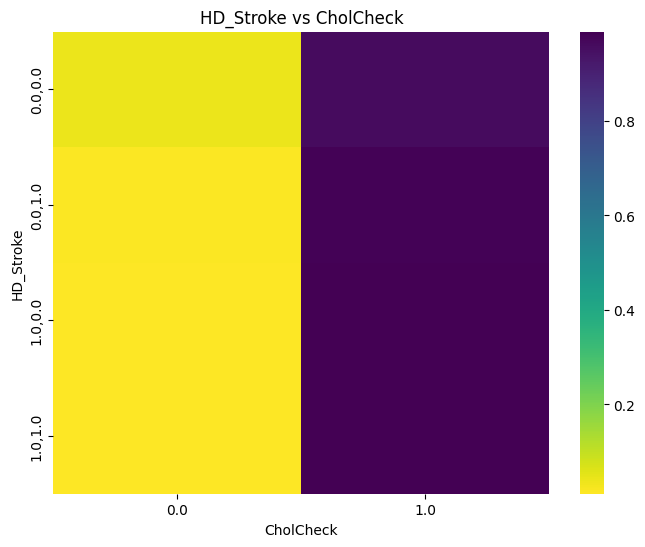

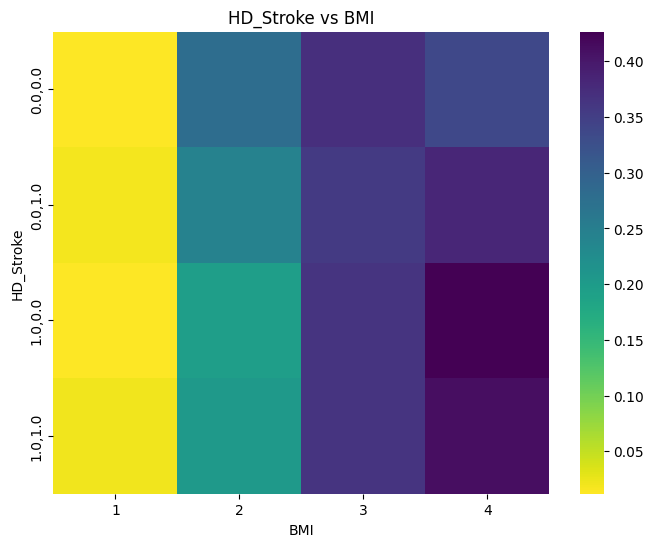

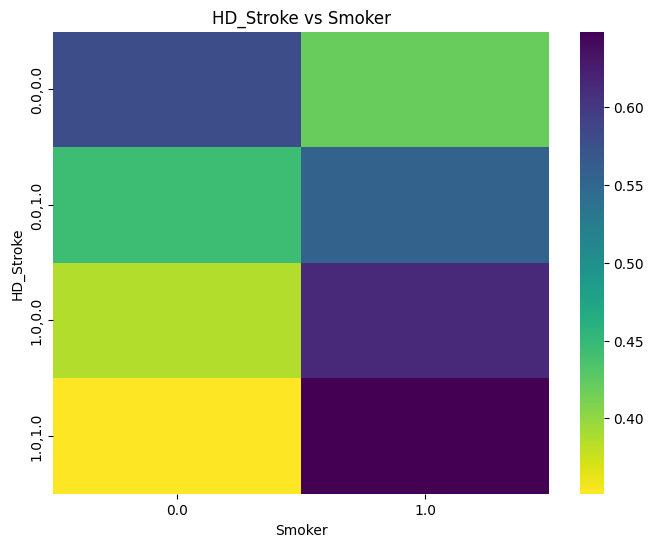

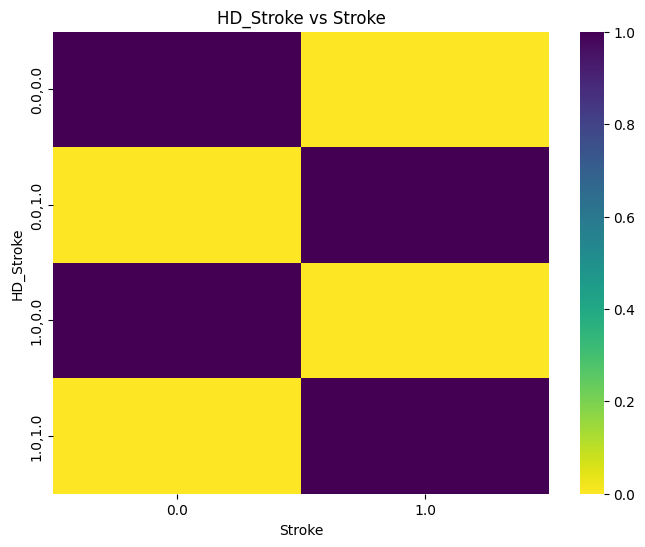

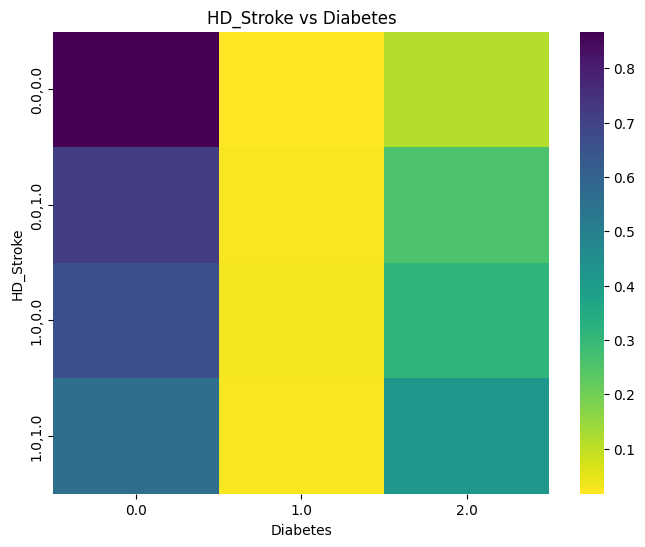

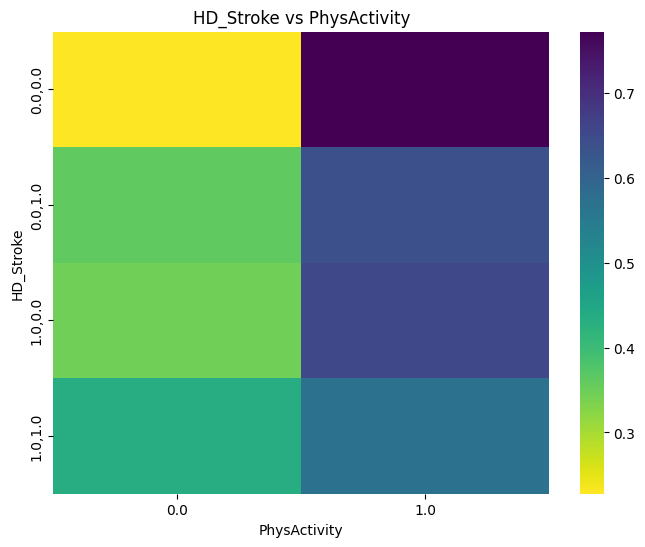

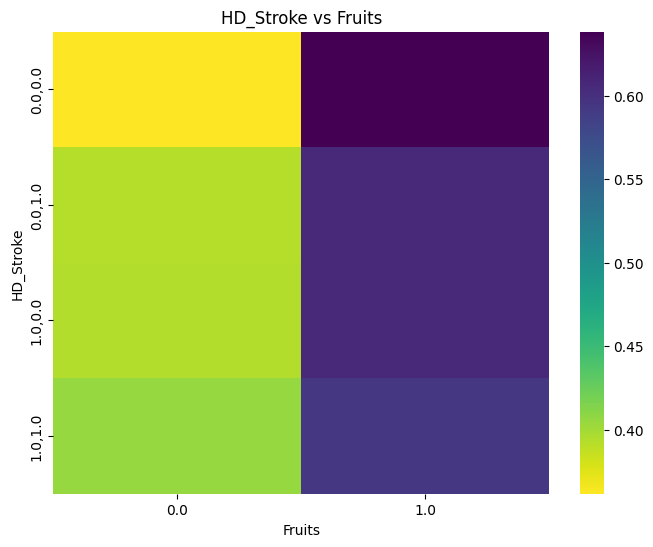

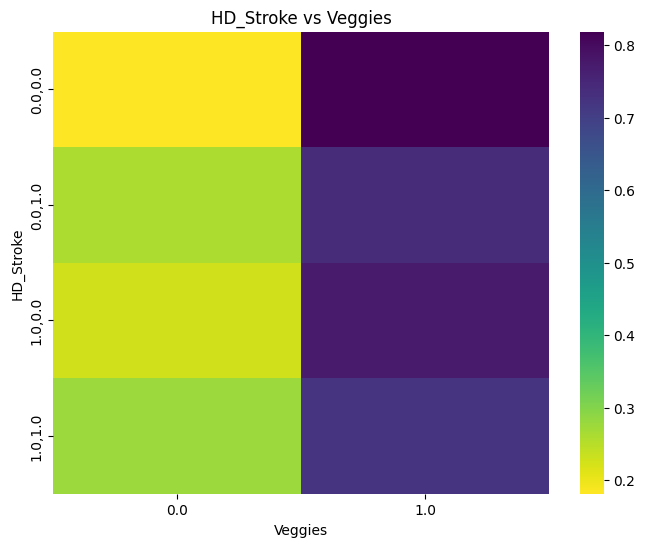

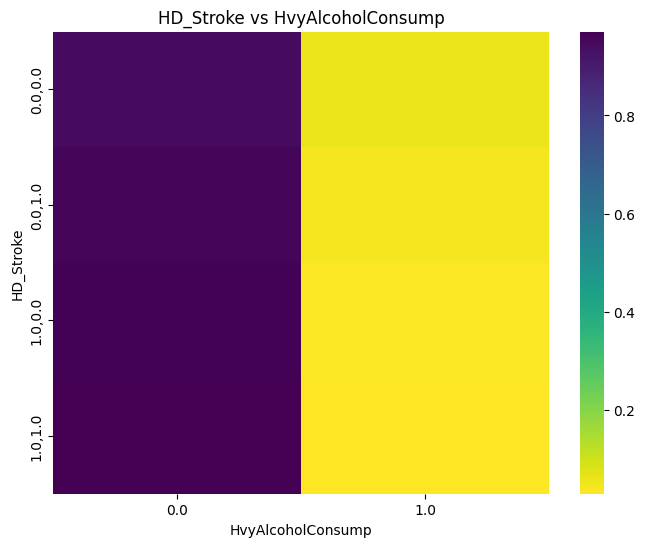

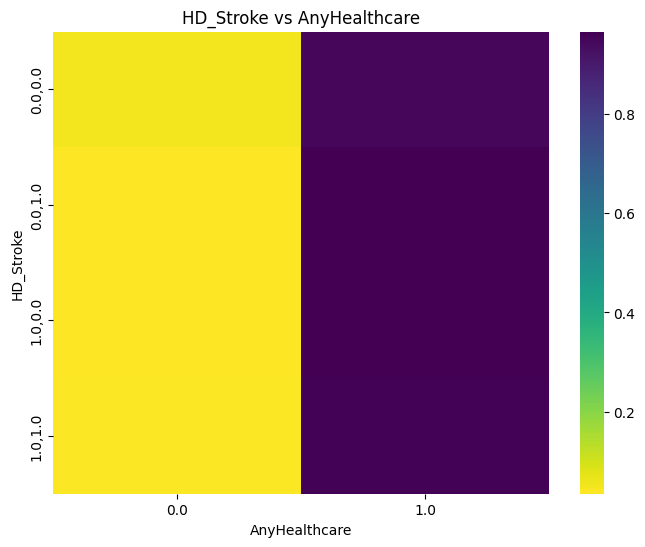

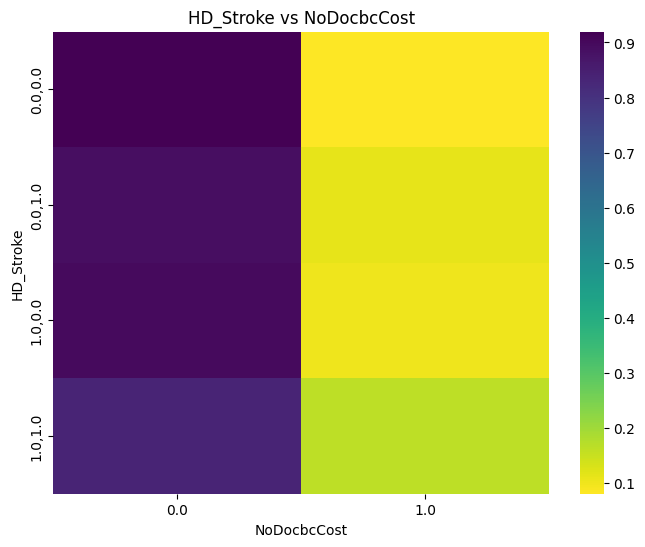

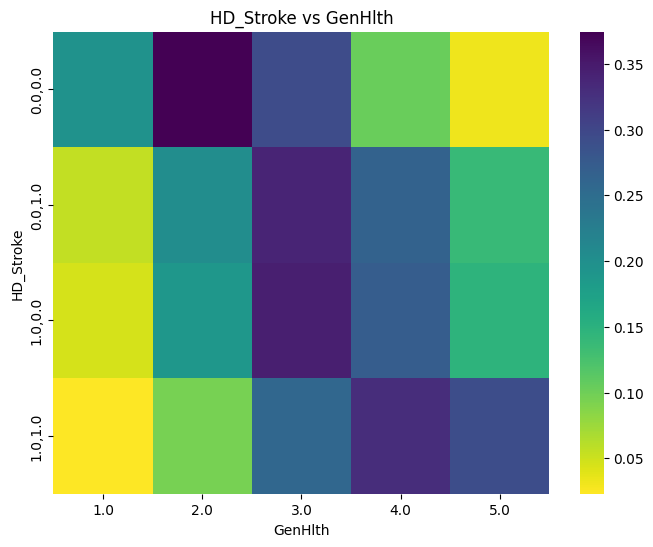

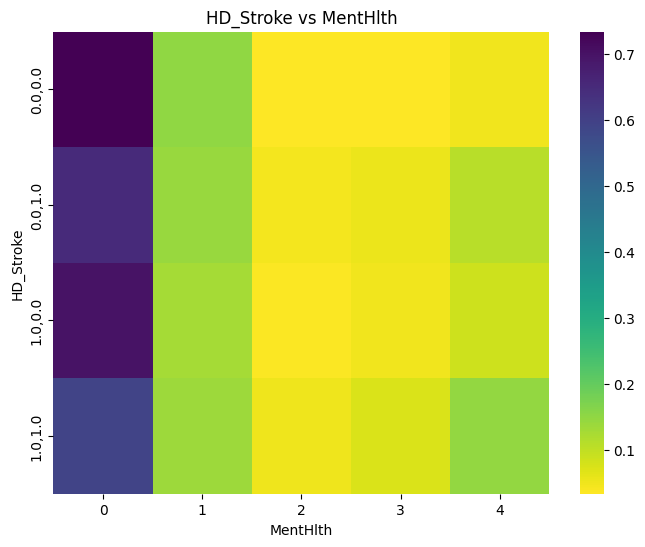

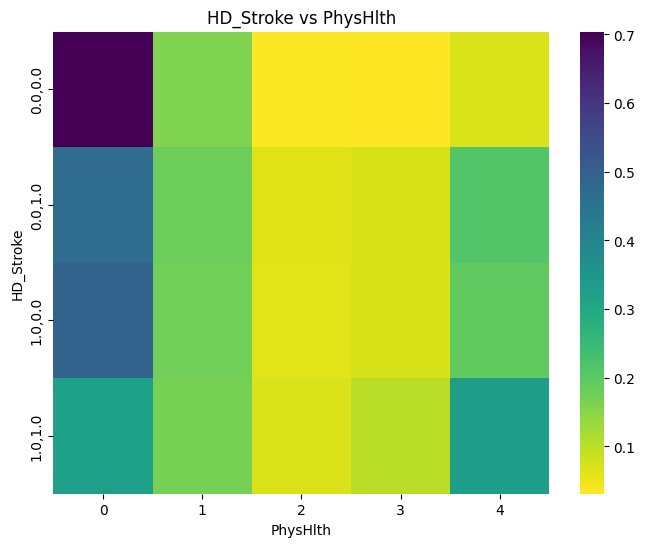

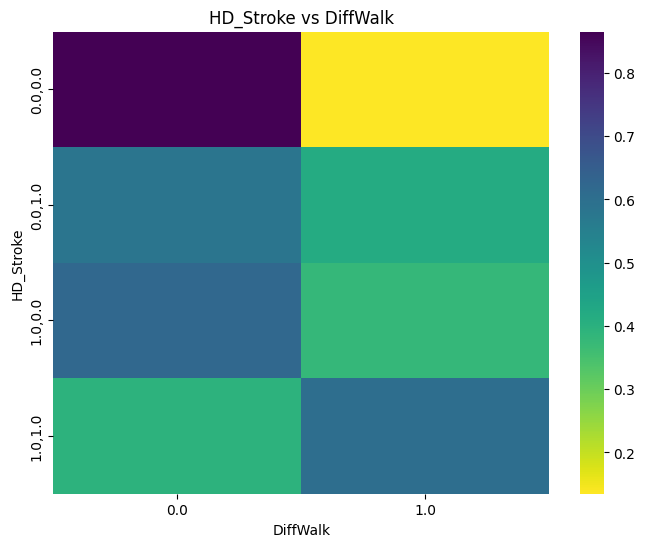

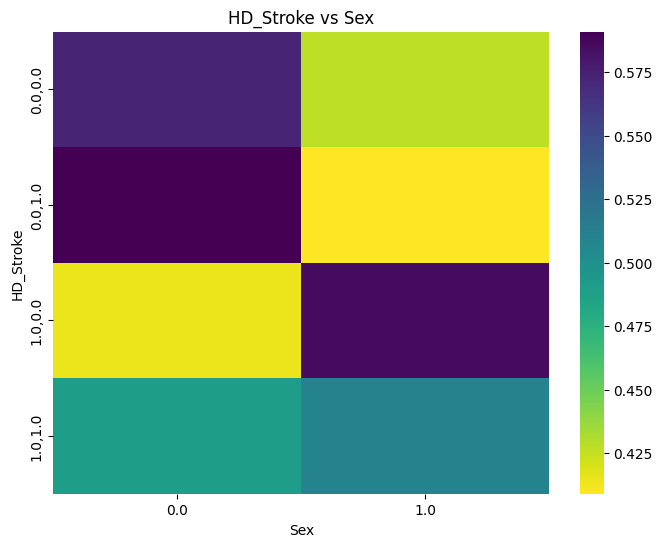

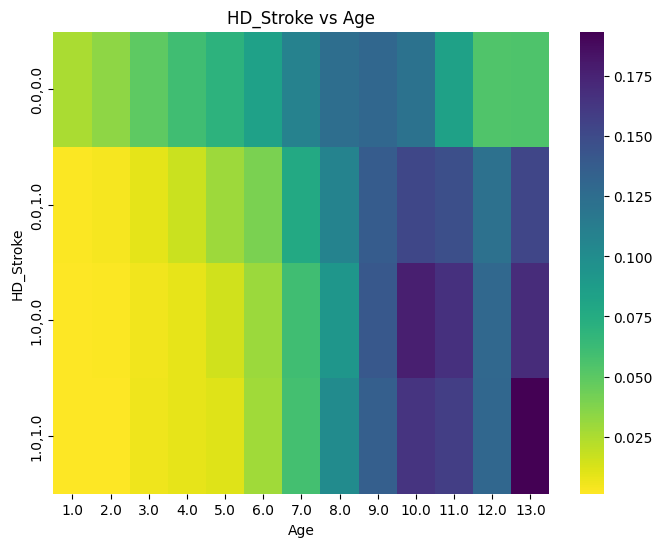

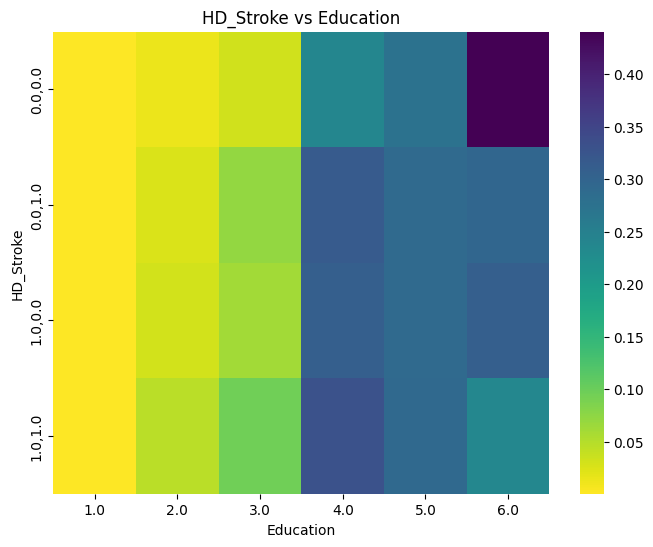

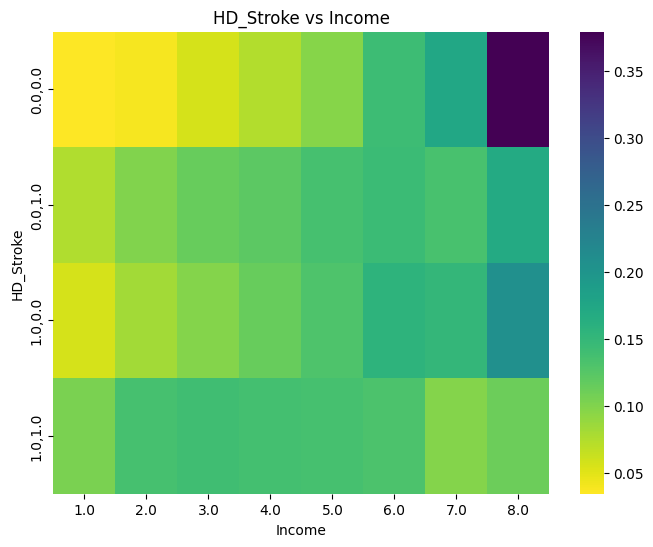

In [ ]:
# Loop through each column in n_df and create heatmap
for col in df_copy.columns:
    
    # Create contingency table
    contingency_table = pd.crosstab(HS_df['HD_Stroke'], df_copy[col], normalize='index')
    
    
    # Create heatmap using seaborn
    plt.figure(figsize = (8,6))
    sns.heatmap(contingency_table, cmap='viridis_r')
    plt.title("HD_Stroke vs " + col)
    plt.show()

In [ ]:
n_df = pd.read_csv('pairs.csv')
n_df

,HighBP_HighChol,HighBP_CholCheck,HighBP_BMI,HighBP_Smoker,HighBP_Stroke,HighBP_Diabetes,HighBP_PhysActivity,HighBP_Fruits,HighBP_Veggies,HighBP_HvyAlcoholConsump,...,DiffWalk_Sex,DiffWalk_Age,DiffWalk_Education,DiffWalk_Income,Sex_Age,Sex_Education,Sex_Income,Age_Education,Age_Income,Education_Income
0,"1,1","1,1","1,4","1,1","1,0","1,0","1,0","1,0","1,1","1,0",...,"1,0","1,9","1,4","1,3","0,9","0,4","0,3","9,4","9,3","4,3"
1,"0,0","0,0","0,3","0,1","0,0","0,0","0,1","0,0","0,0","0,0",...,"0,0","0,7","0,6","0,1","0,7","0,6","0,1","7,6","7,1","6,1"
2,"1,1","1,1","1,3","1,0","1,0","1,0","1,0","1,1","1,0","1,0",...,"1,0","1,9","1,4","1,8","0,9","0,4","0,8","9,4","9,8","4,8"
3,"1,0","1,1","1,3","1,0","1,0","1,0","1,1","1,1","1,1","1,0",...,"0,0","0,11","0,3","0,6","0,11","0,3","0,6","11,3","11,6","3,6"
4,"1,1","1,1","1,2","1,0","1,0","1,0","1,1","1,1","1,1","1,0",...,"0,0","0,11","0,5","0,4","0,11","0,5","0,4","11,5","11,4","5,4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,"1,1","1,1","1,4","1,0","1,0","1,0","1,0","1,1","1,1","1,0",...,"0,1","0,5","0,6","0,7","1,5","1,6","1,7","5,6","5,7","6,7"
253676,"1,1","1,1","1,1","1,0","1,0","1,2","1,0","1,0","1,0","1,0",...,"1,0","1,11","1,2","1,4","0,11","0,2","0,4","11,2","11,4","2,4"
253677,"0,0","0,1","0,3","0,0","0,0","0,0","0,1","0,1","0,0","0,0",...,"0,0","0,2","0,5","0,2","0,2","0,5","0,2","2,5","2,2","5,2"
253678,"1,0","1,1","1,2","1,0","1,0","1,0","1,0","1,1","1,1","1,0",...,"0,1","0,7","0,5","0,1","1,7","1,5","1,1","7,5","7,1","5,1"


In [ ]:
df_pair = n_df[['GenHlth_Age','HighBP_GenHlth','PhysHlth_Age','HighChol_GenHlth','DiffWalk_Age','HighBP_Age']]
df_pair.head()

,GenHlth_Age,HighBP_GenHlth,PhysHlth_Age,HighChol_GenHlth,DiffWalk_Age,HighBP_Age
0,"5,9","1,5","3,9","1,5","1,9","1,9"
1,"3,7","0,3","0,7","0,3","0,7","0,7"
2,"5,9","1,5","4,9","1,5","1,9","1,9"
3,"2,11","1,2","0,11","0,2","0,11","1,11"
4,"2,11","1,2","0,11","1,2","0,11","1,11"


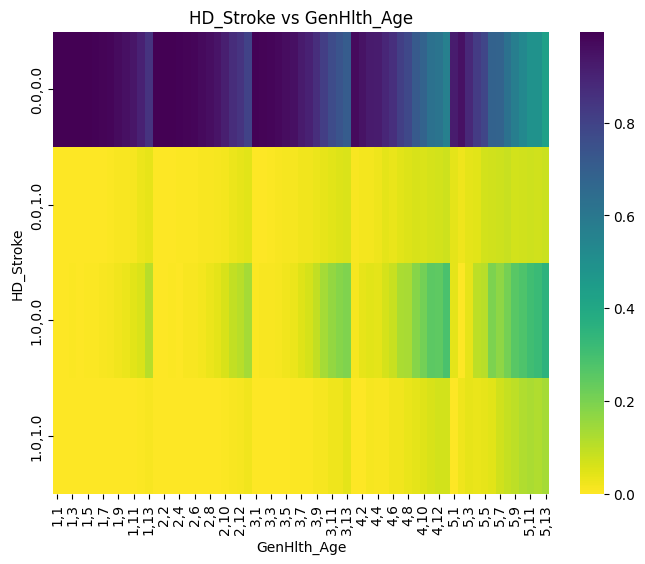

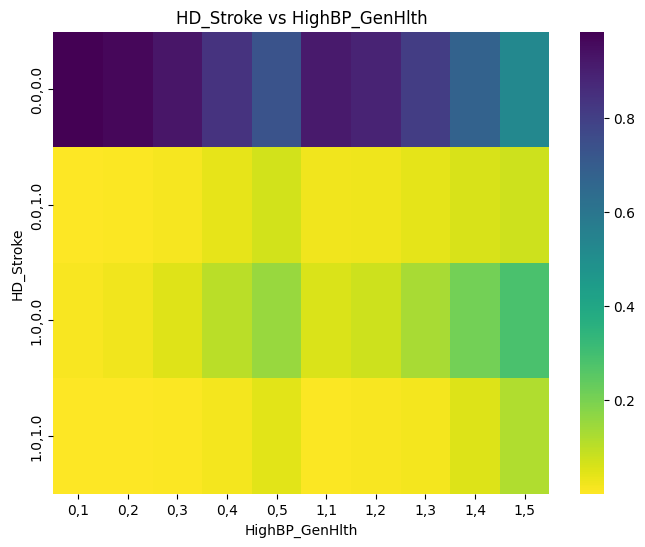

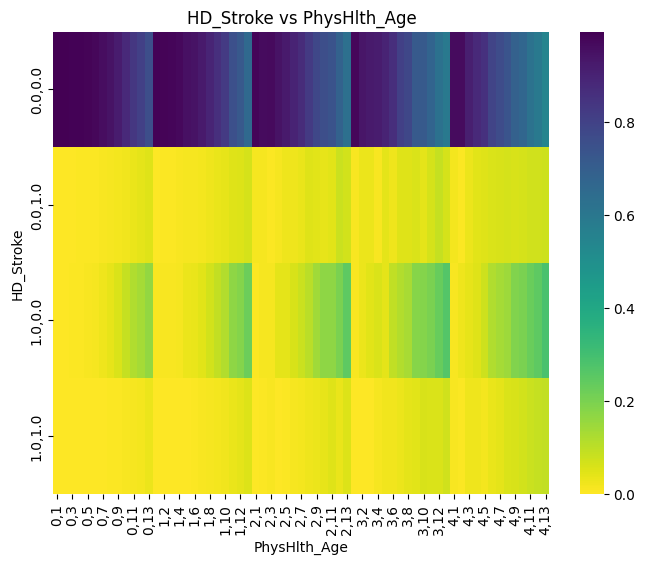

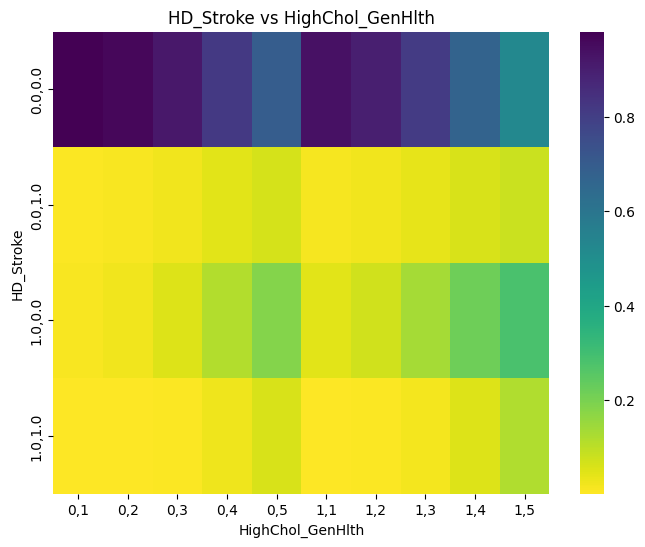

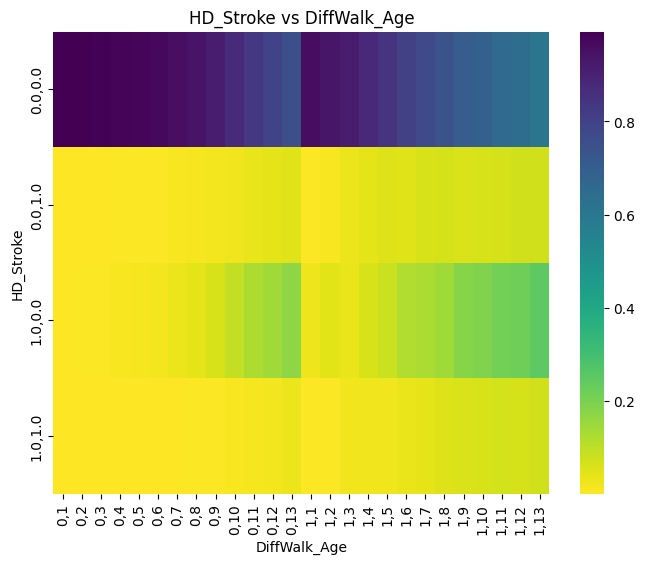

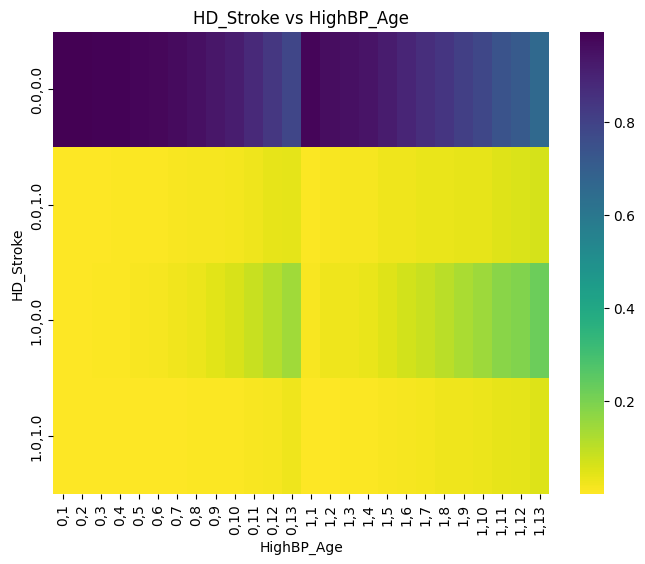

In [ ]:
# Loop through each column in n_df and create heatmap
for col in df_pair.columns:
    
    # Create contingency table
    contingency_table = pd.crosstab(df_pair[col], HS_df['HD_Stroke'], normalize='index')
    
    indname = contingency_table.index.astype(str)

    lists = [list(map(int, s.split(","))) for s in indname]

    # Sort the list of lists by the first element and then the second element
    sorted_lists = sorted(lists, key=lambda x: (x[0], x[1]))

    # Convert the sorted list of tuples back to a list of lists
    sorted_strings = [list(map(str, t)) for t in sorted_lists]

    # Join each list of strings with a comma to get the final sorted list of strings
    result = [",".join(s) for s in sorted_strings]

    # Sort the DataFrame by the desired order of the index
    sorted_table = contingency_table.reindex(result).T
    
    # Create heatmap using seaborn
    plt.figure(figsize = (8,6))
    sns.heatmap(sorted_table, cmap='viridis_r')
    plt.title("HD_Stroke vs " + col)
    plt.show()

In [ ]:
hd = pd.concat([df_pair,HS_df], axis = 1)

In [ ]:
hd

,GenHlth_Age,HighBP_GenHlth,PhysHlth_Age,HighChol_GenHlth,DiffWalk_Age,HighBP_Age,HD_Stroke
0,"5,9","1,5","3,9","1,5","1,9","1,9","0.0,0.0"
1,"3,7","0,3","0,7","0,3","0,7","0,7","0.0,0.0"
2,"5,9","1,5","4,9","1,5","1,9","1,9","0.0,0.0"
3,"2,11","1,2","0,11","0,2","0,11","1,11","0.0,0.0"
4,"2,11","1,2","0,11","1,2","0,11","1,11","0.0,0.0"
...,...,...,...,...,...,...,...
253675,"3,5","1,3","1,5","1,3","0,5","1,5","0.0,0.0"
253676,"4,11","1,4","0,11","1,4","1,11","1,11","0.0,0.0"
253677,"1,2","0,1","0,2","0,1","0,2","0,2","0.0,0.0"
253678,"3,7","1,3","0,7","0,3","0,7","1,7","0.0,0.0"


In [ ]:
hd1 = hd[hd["HD_Stroke"] != "0.0,0.0"]
hd1

,GenHlth_Age,HighBP_GenHlth,PhysHlth_Age,HighChol_GenHlth,DiffWalk_Age,HighBP_Age,HD_Stroke
8,"5,9","1,5","4,9","1,5","1,9","1,9","1.0,0.0"
14,"4,4","0,4","4,4","1,4","0,4","0,4","0.0,1.0"
20,"3,12","1,3","0,12","1,3","1,12","1,12","1.0,1.0"
26,"5,10","1,5","0,10","1,5","1,10","1,10","1.0,1.0"
27,"4,12","1,4","0,12","1,4","0,12","1,12","1.0,0.0"
...,...,...,...,...,...,...,...
253668,"2,10","0,2","0,10","1,2","1,10","0,10","1.0,0.0"
253670,"5,13","1,5","0,13","1,5","1,13","1,13","1.0,0.0"
253671,"4,8","1,4","1,8","1,4","0,8","1,8","1.0,1.0"
253672,"3,12","1,3","0,12","0,3","0,12","1,12","1.0,0.0"


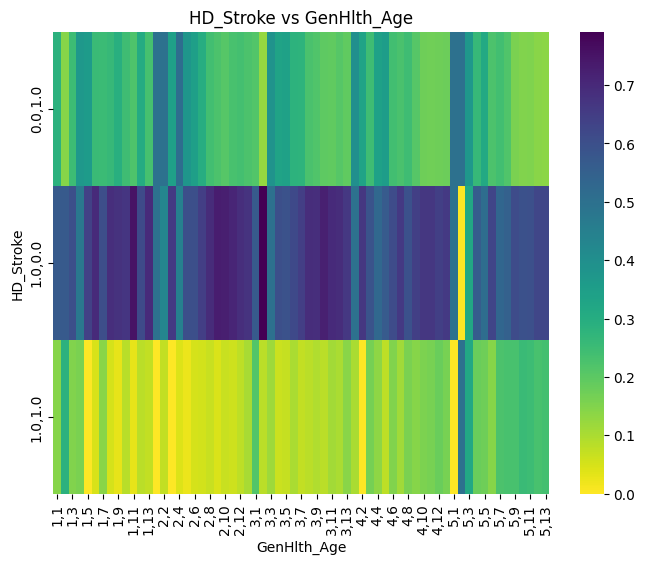

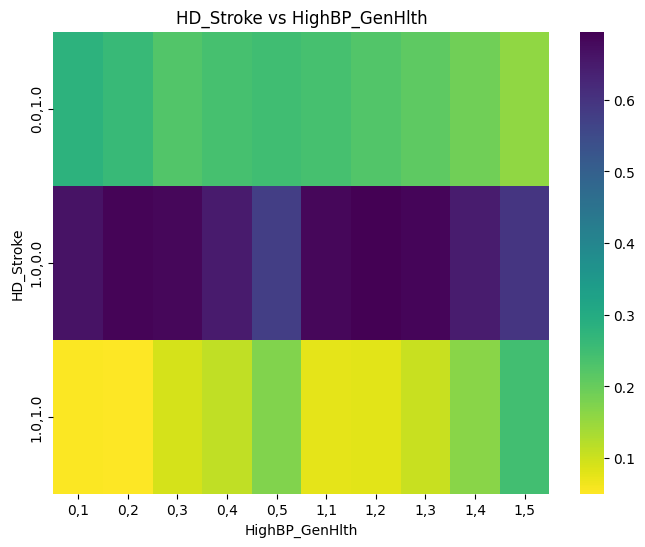

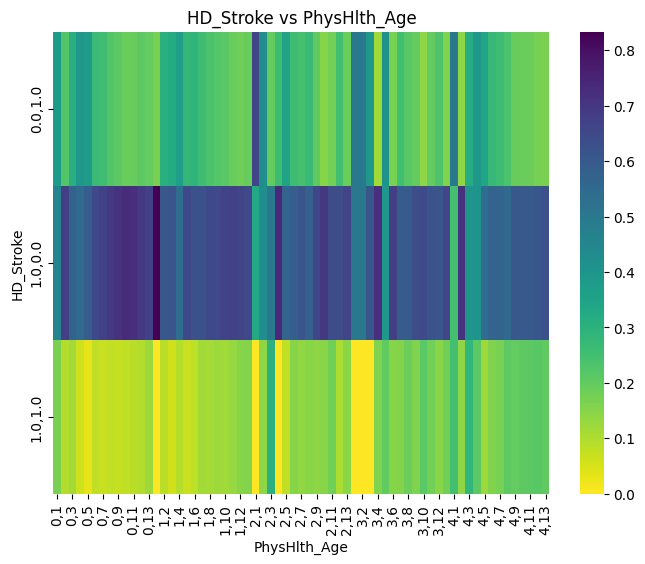

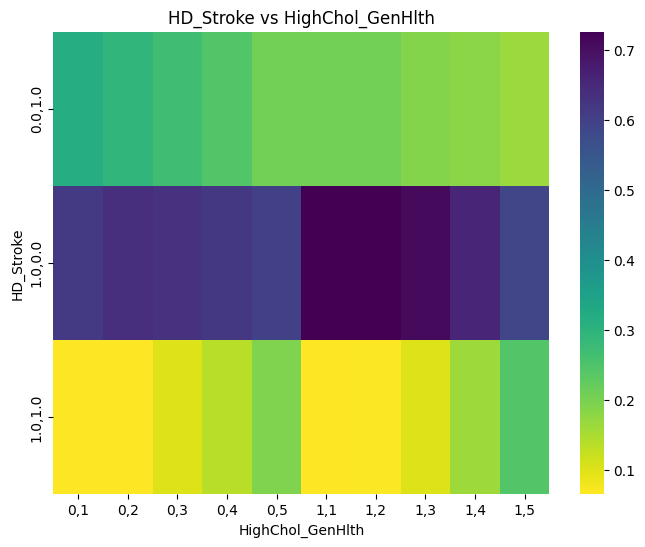

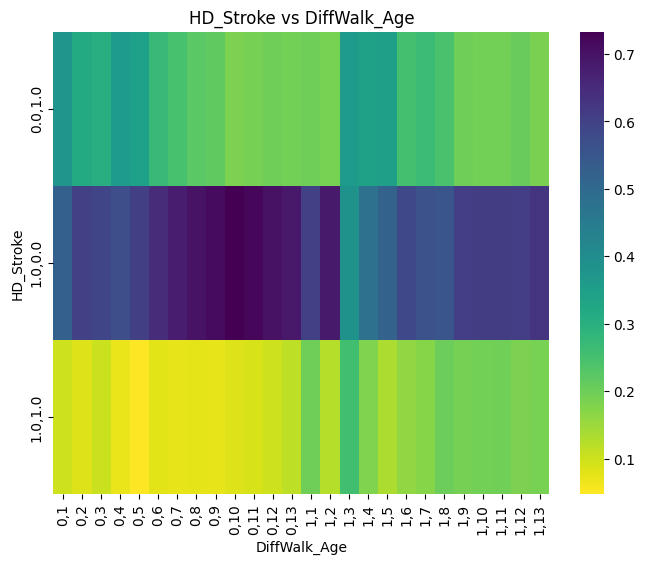

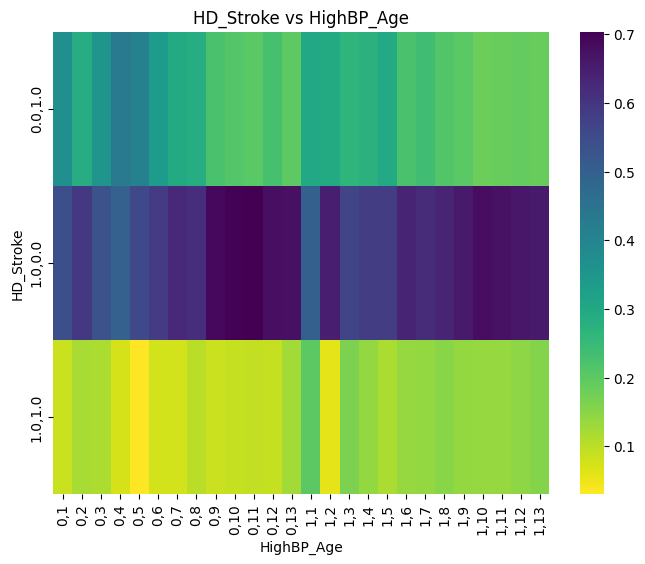

ValueError: invalid literal for int() with base 10: '0.0'

In [ ]:
# Loop through each column in n_df and create heatmap
for col in hd1.columns:
    
    # Create contingency table
    contingency_table = pd.crosstab(hd1[col], hd1['HD_Stroke'], normalize='index')
    
    indname = contingency_table.index.astype(str)

    lists = [list(map(int, s.split(","))) for s in indname]

    # Sort the list of lists by the first element and then the second element
    sorted_lists = sorted(lists, key=lambda x: (x[0], x[1]))

    # Convert the sorted list of tuples back to a list of lists
    sorted_strings = [list(map(str, t)) for t in sorted_lists]

    # Join each list of strings with a comma to get the final sorted list of strings
    result = [",".join(s) for s in sorted_strings]

    # Sort the DataFrame by the desired order of the index
    sorted_table = contingency_table.reindex(result).T
    
    # Create heatmap using seaborn
    plt.figure(figsize = (8,6))
    sns.heatmap(sorted_table, cmap='viridis_r')
    plt.title("HD_Stroke vs " + col)
    plt.show()